# Data cleaning and Transformation
handle missing values

# importing packages

In [2]:
import missingno as msno
import pandas as pd
import logging
import sys
import os
import matplotlib as plt



# extracting dataset

In [3]:
import psycopg2
import pandas as pd

db_credentials = {
    'user': 'postgres',
    'password': 'Nurye@68793',
    'host': 'localhost',
    'port': '5432',
    'database': 'nurye'
}

# Establish a connection
connection = psycopg2.connect(
    user=db_credentials['user'],
    password=db_credentials['password'],
    host=db_credentials['host'],
    port=db_credentials['port'],
    database=db_credentials['database']
)

# Create a cursor
cursor = connection.cursor()


sql_query = "SELECT * FROM xdr_data;"
cursor.execute(sql_query)

# Fetch the results
df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Close cursor and connection
cursor.close()
connection.close()



### looking the information of the dataset
the data contains 150001 rows and 55 columns with data type of floats and objectes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [5]:
# identify thos which do not have missing values
i = 0
for key, item in df.isnull().sum().items():
    if item==0:
        i+=1
        print(key)
print('the dataset contain {} columns with no missing values'.format(i))

Social Media DL (Bytes)
Social Media UL (Bytes)
Google DL (Bytes)
Google UL (Bytes)
Email DL (Bytes)
Email UL (Bytes)
Youtube DL (Bytes)
Youtube UL (Bytes)
Netflix DL (Bytes)
Netflix UL (Bytes)
Gaming DL (Bytes)
Gaming UL (Bytes)
Other DL (Bytes)
Other UL (Bytes)
the dataset contain 14 columns with no missing values


In [6]:
#get those who has missing values
columns = []
counts=[]
i=0
for key, item in df.isnull().sum().items():
    if item != 0:
        columns.append(key)
        counts.append(item)
        i+=1
print('the dataset has {} columns with missing values'.format(i))
pd.DataFrame({'column name':columns,'counts':counts})

the dataset has 41 columns with missing values


,column name,counts
0,Bearer Id,991
1,Start,1
2,Start ms,1
3,End,1
4,End ms,1
5,Dur. (ms),1
6,IMSI,570
7,MSISDN/Number,1066
8,IMEI,572
9,Last Location Name,1153


<Axes: >

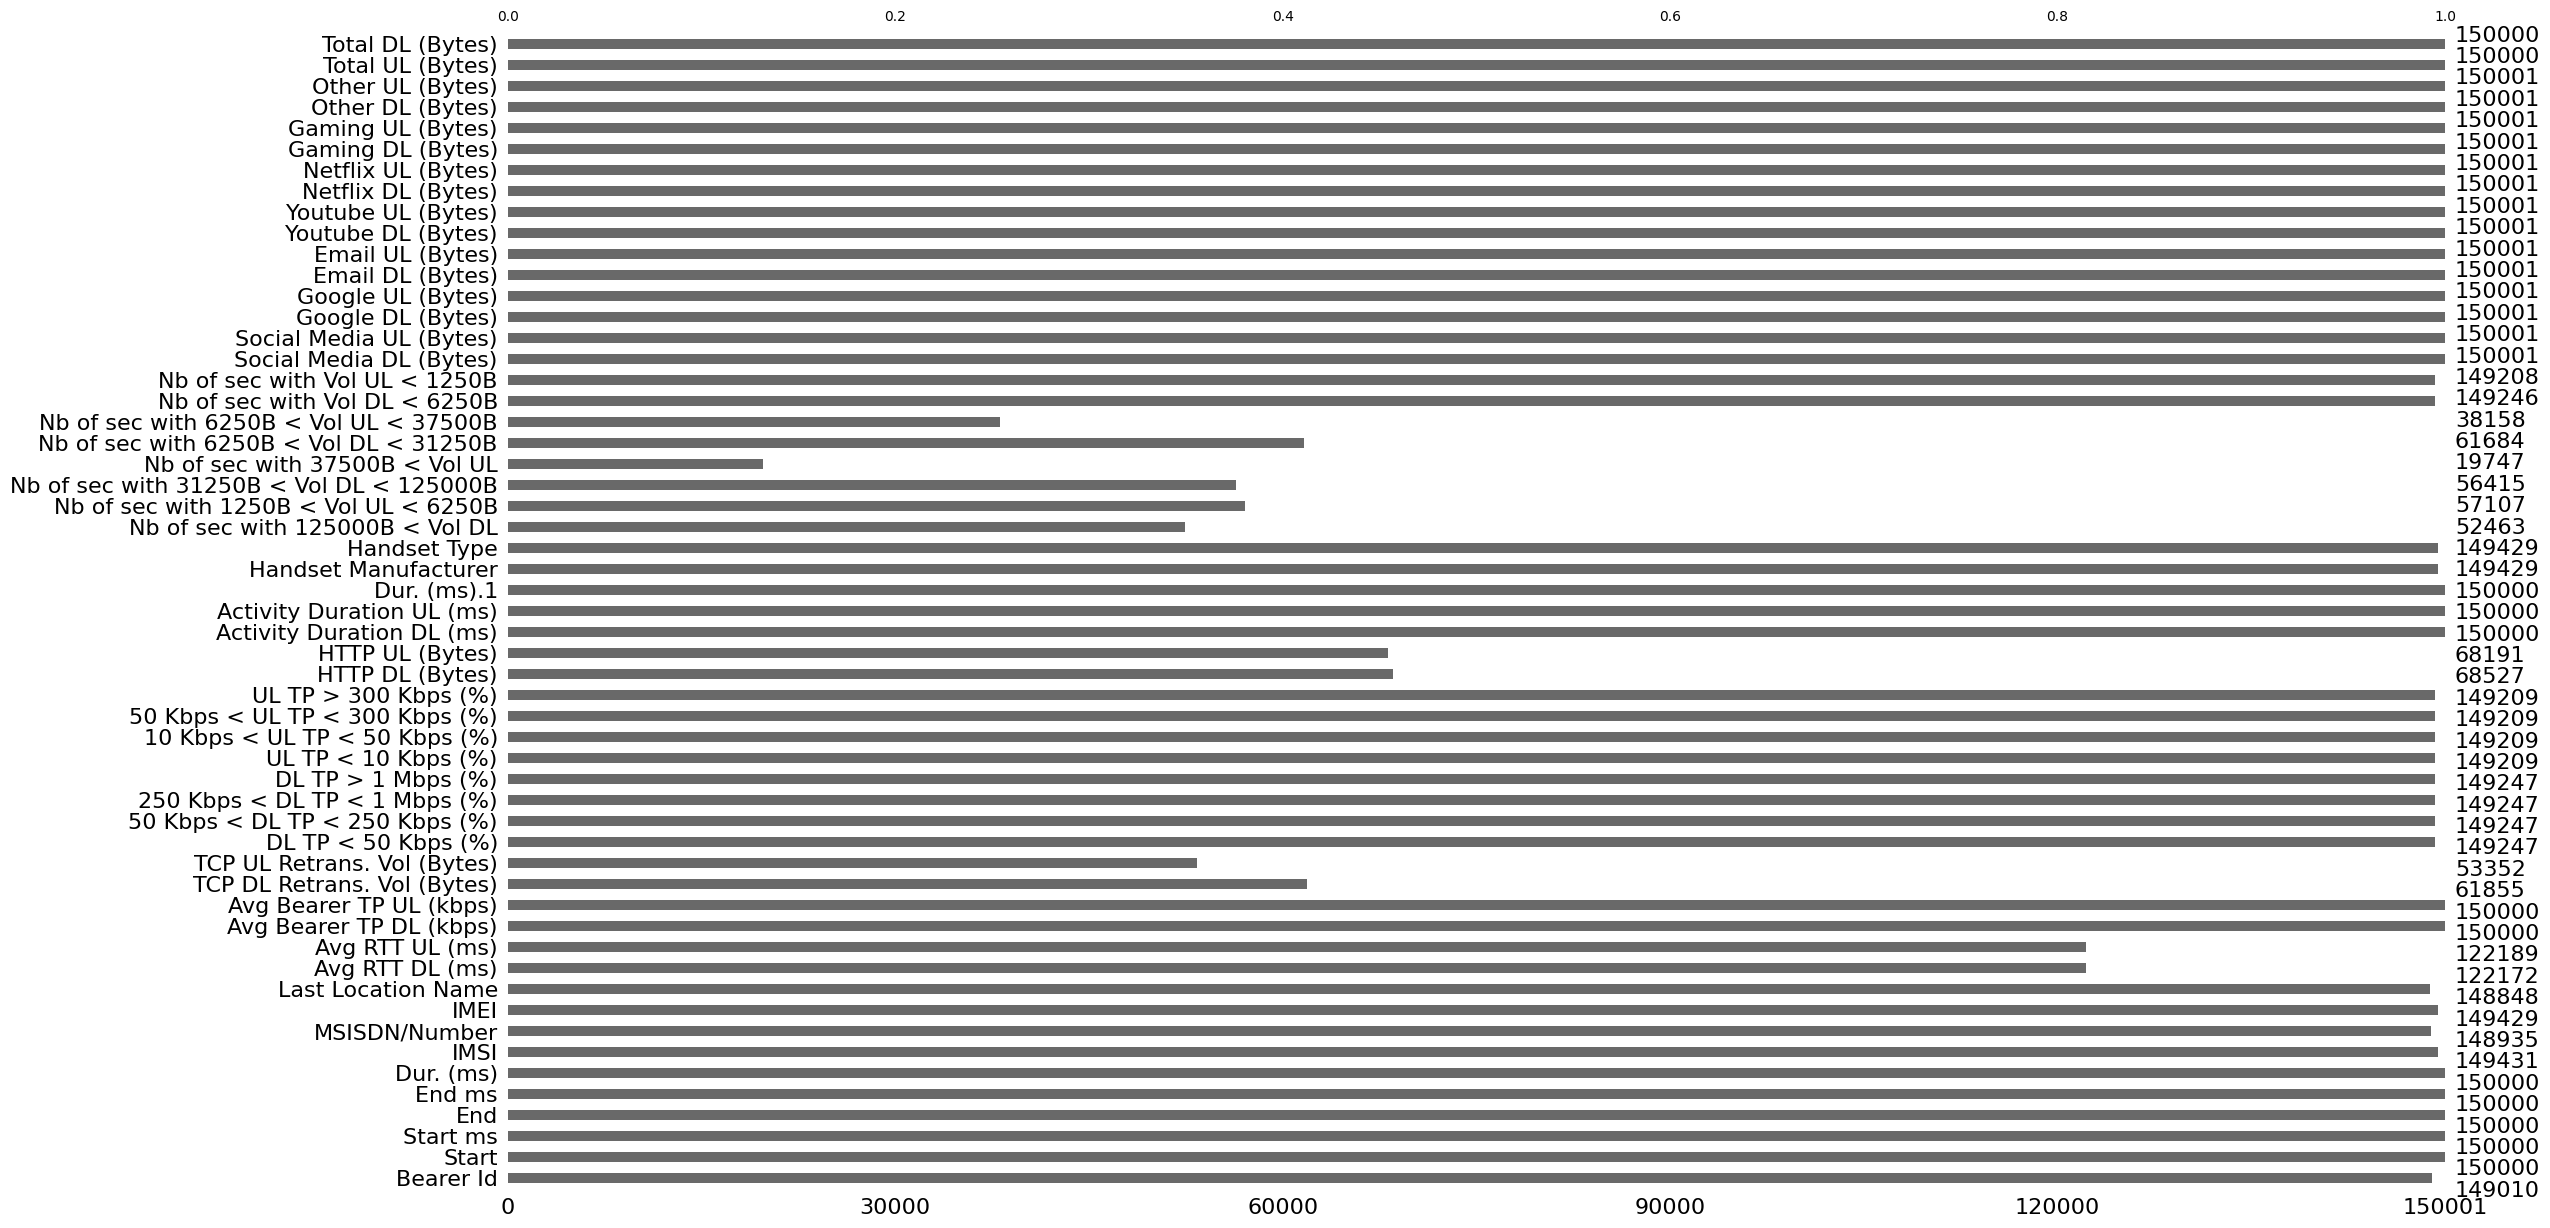

In [7]:
msno.bar(df)

<Axes: >

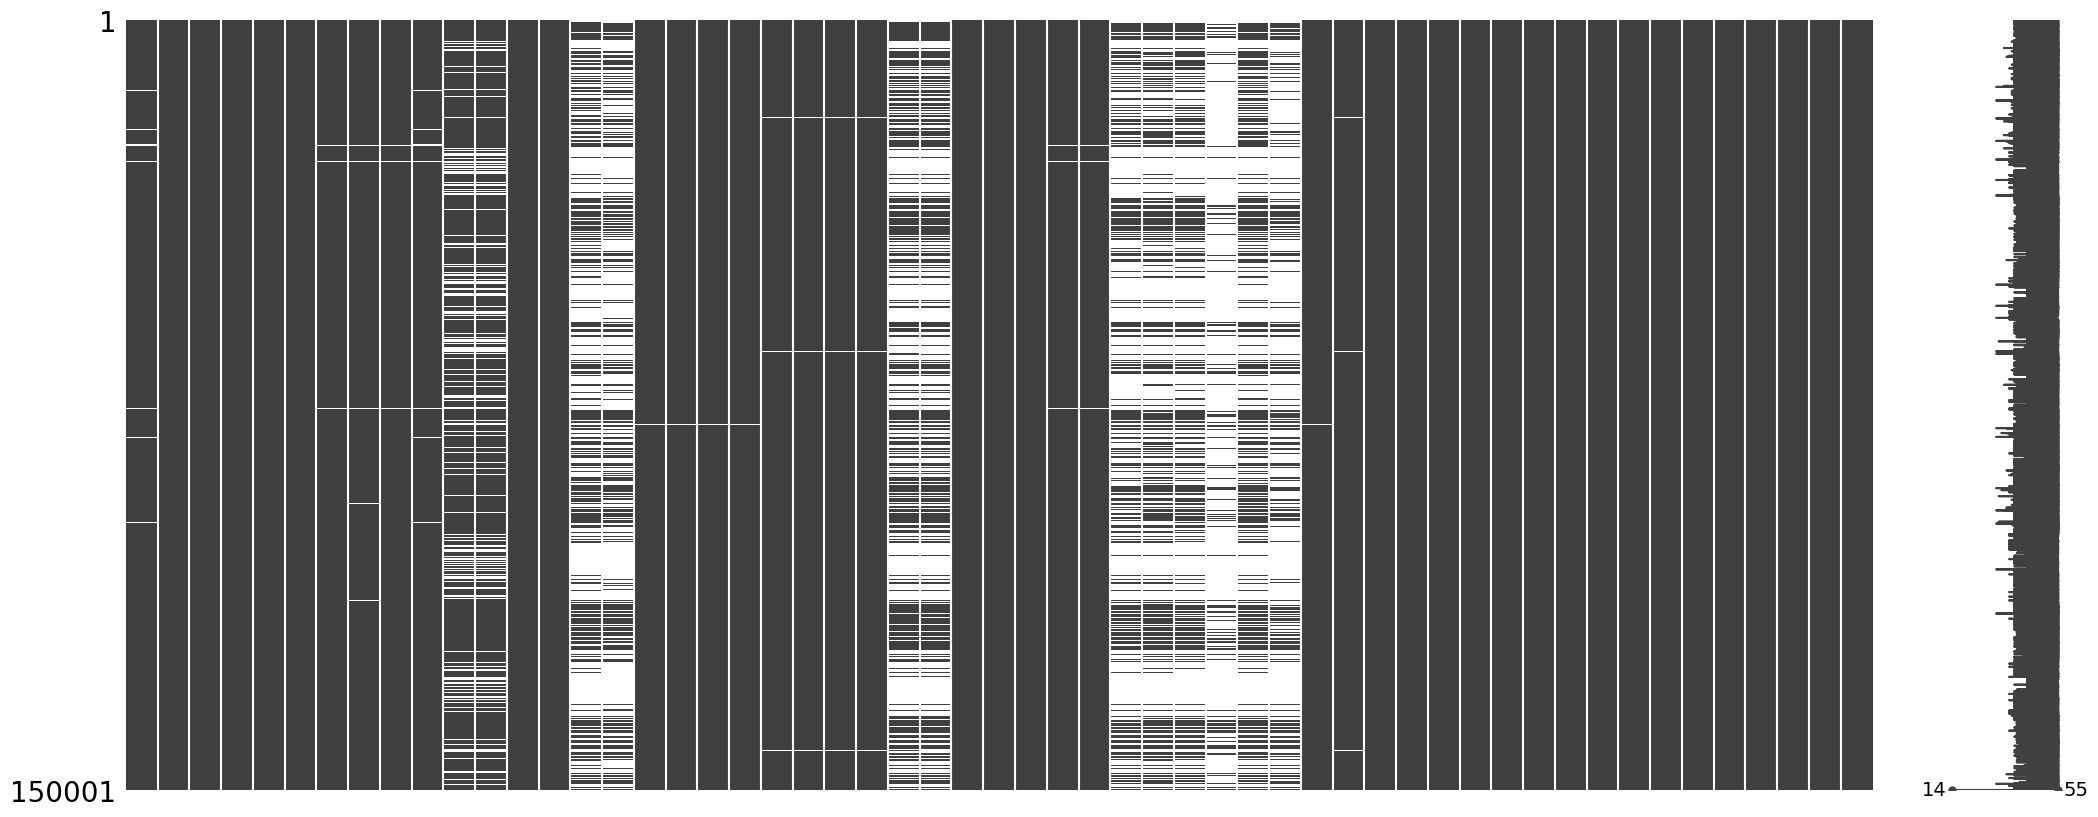

In [8]:
msno.matrix(df)


<Axes: >

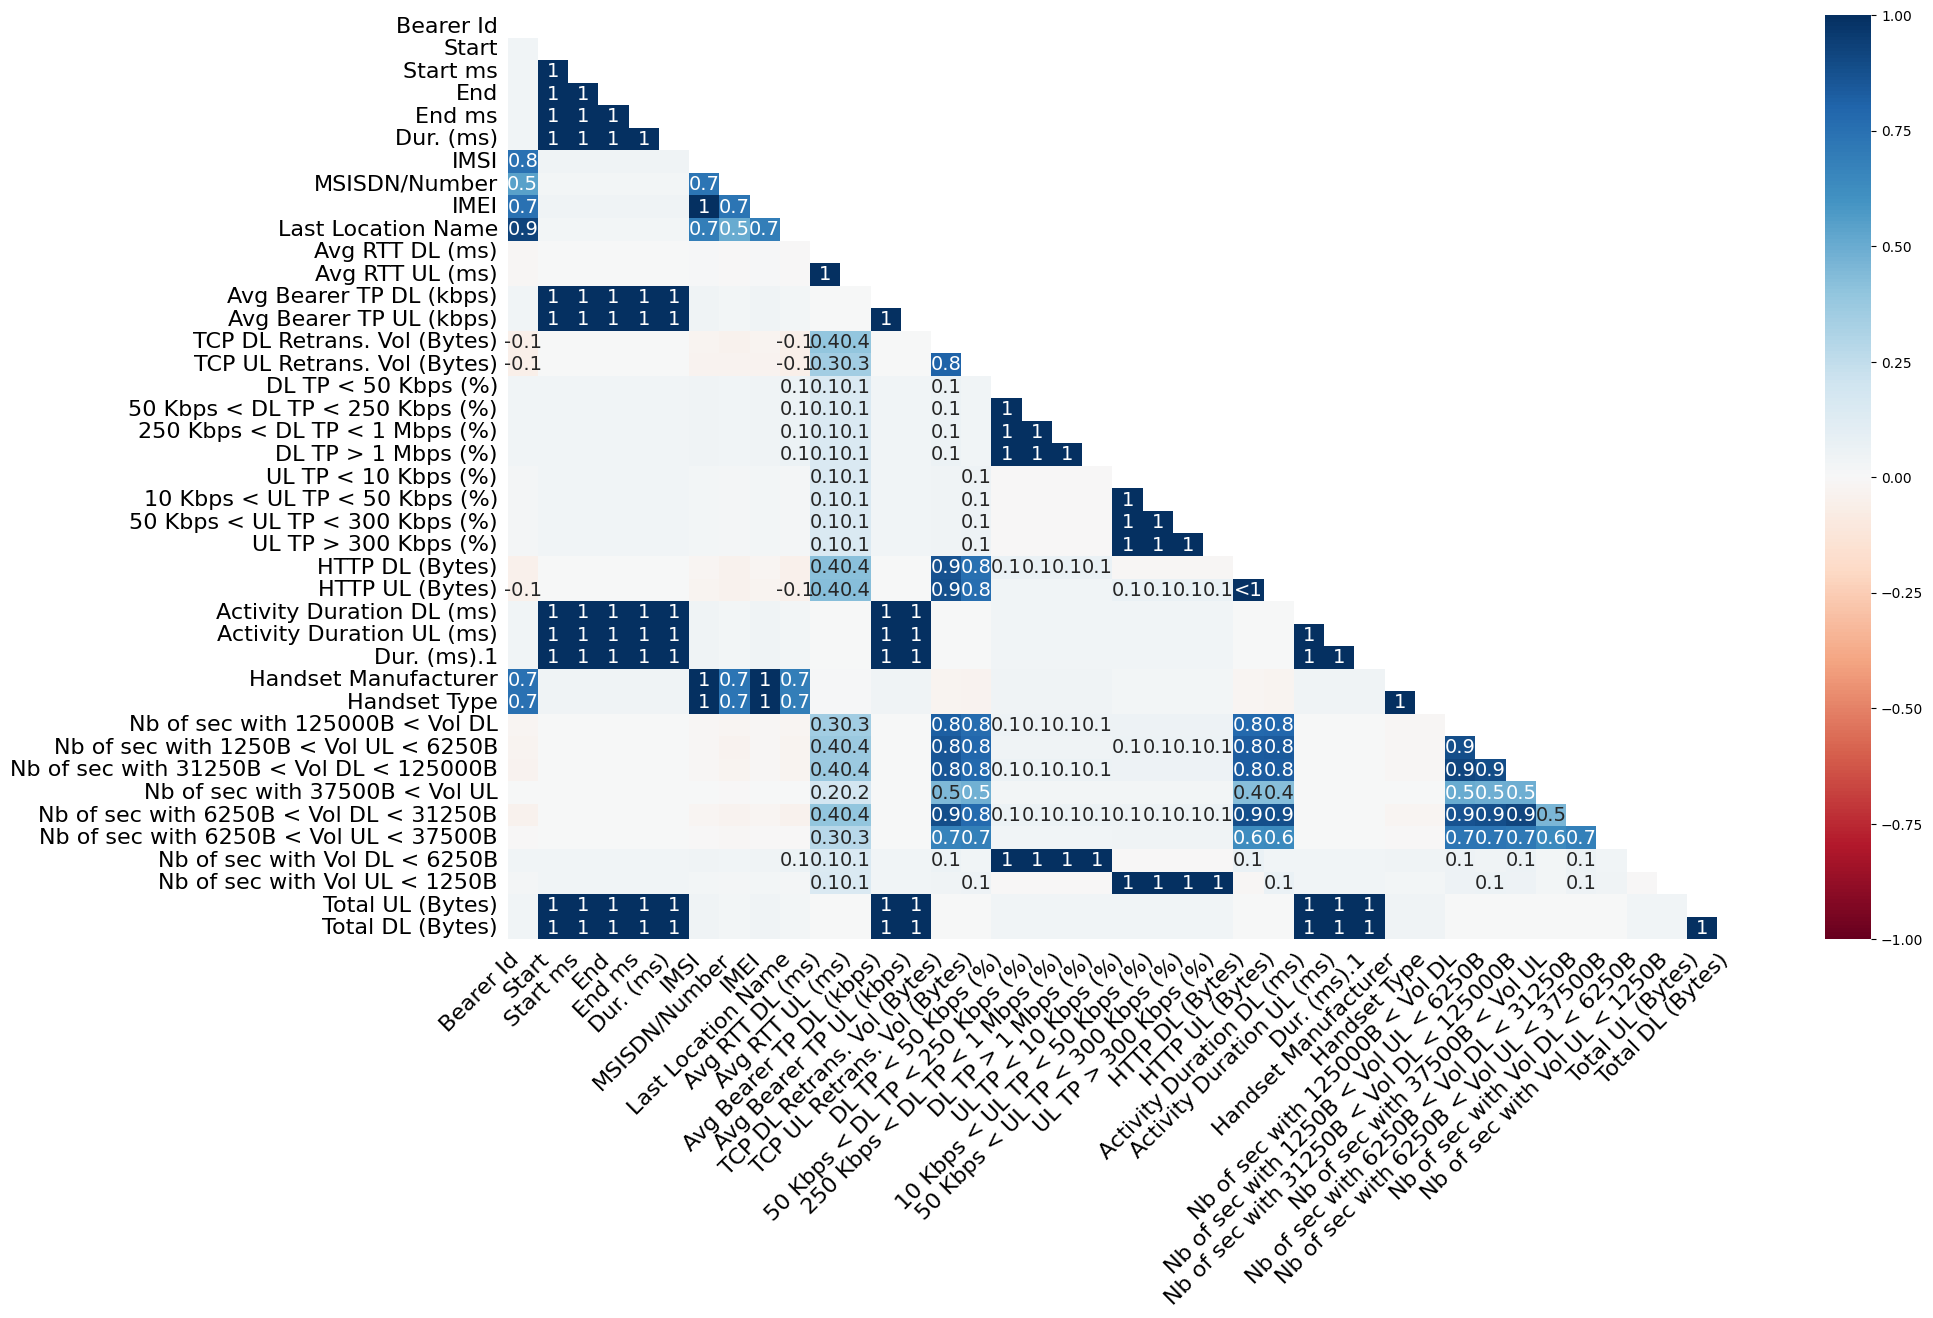

In [9]:
msno.heatmap(df)

<Axes: >

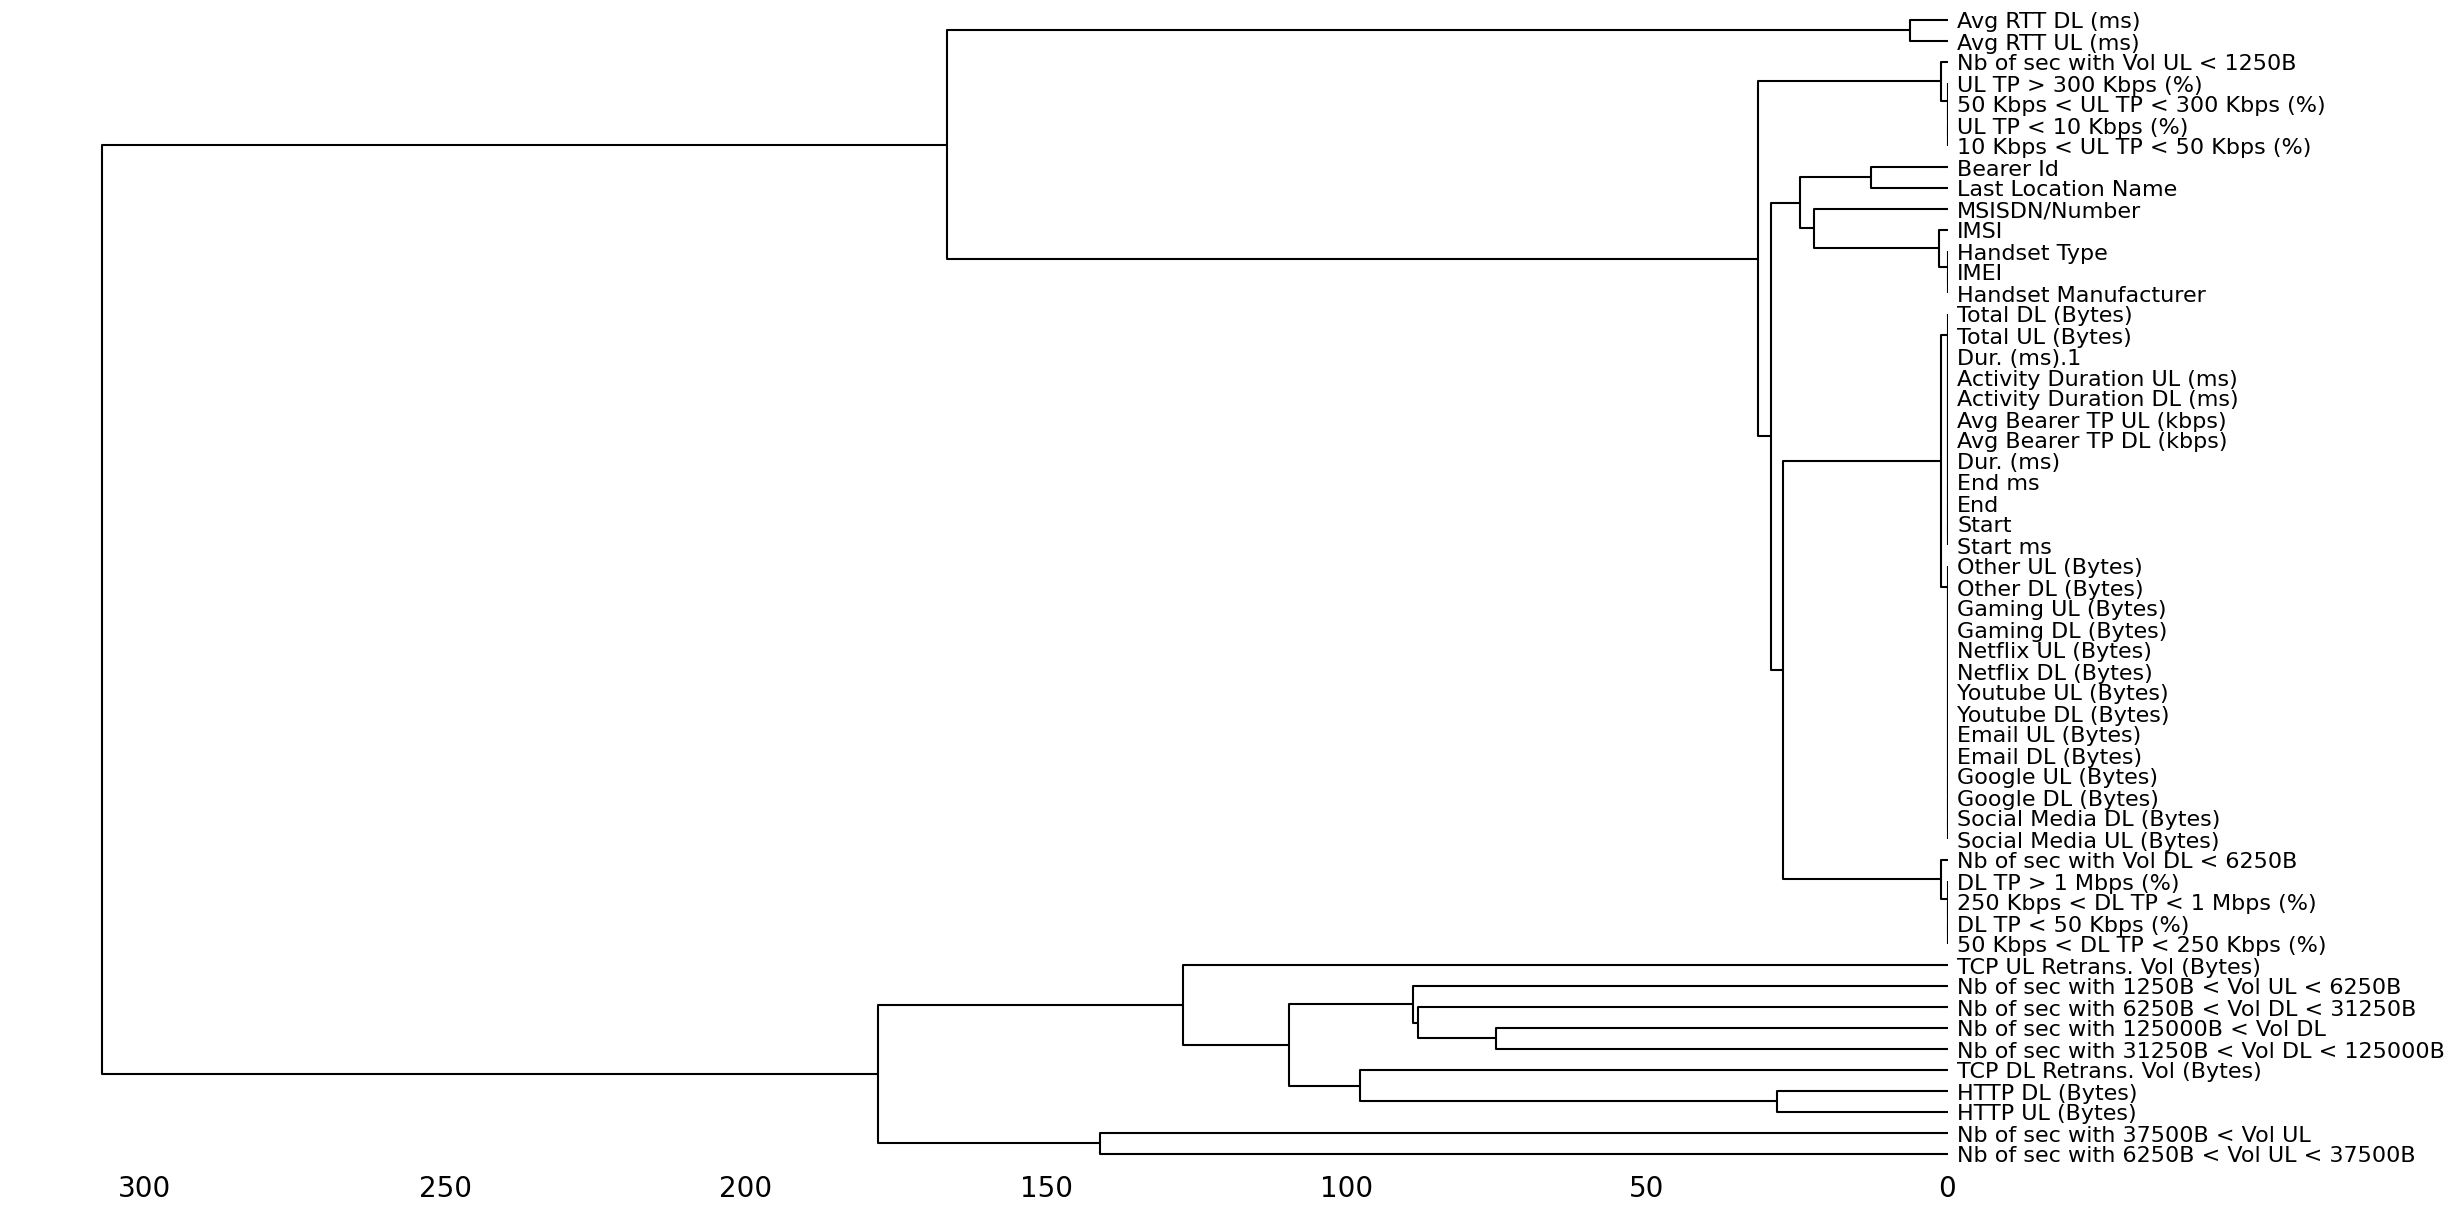

In [10]:
msno.dendrogram(df)

In [11]:
def percent_missing(df):
    totalCells = df.size  # Total number of cells in the DataFrame
    missingCount = df.isnull().sum().sum()  # Total number of missing cells
    totalMissing = df.isnull().sum()  # Total number of missing values in each column
    
    return totalCells, missingCount, totalMissing
totalCells, missingCount, totalMissing = percent_missing(df)
print("The Telcom dataset contains", round(
    ((totalMissing/totalCells) * 100), 2), "%", "missing values.")

The Telcom dataset contains Bearer Id                                   0.01
Start                                       0.00
Start ms                                    0.00
End                                         0.00
End ms                                      0.00
Dur. (ms)                                   0.00
IMSI                                        0.01
MSISDN/Number                               0.01
IMEI                                        0.01
Last Location Name                          0.01
Avg RTT DL (ms)                             0.34
Avg RTT UL (ms)                             0.34
Avg Bearer TP DL (kbps)                     0.00
Avg Bearer TP UL (kbps)                     0.00
TCP DL Retrans. Vol (Bytes)                 1.07
TCP UL Retrans. Vol (Bytes)                 1.17
DL TP < 50 Kbps (%)                         0.01
50 Kbps < DL TP < 250 Kbps (%)              0.01
250 Kbps < DL TP < 1 Mbps (%)               0.01
DL TP > 1 Mbps (%)                       

From the above graph we can observe that there are a lot of missing values. In total there are 64 % are missed.

# skewness
we cannot calculate skewness for six column as they are in string or datetime format

In [58]:
import pandas as pd
import numpy as np
import logging

class MissingInformation:
    def __init__(self,df:pd.DataFrame):
        self.df = df
        logging.basicConfig(filename='logfile.log', filemode='a',
                            encoding='utf-8', level=logging.DEBUG)
        
    def missing_values_table(self,df:pd.DataFrame)->pd.DataFrame:
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # dtype of missing values
        mis_val_dtype = df.dtypes

        # Make a table with the results
        mis_val_table = pd.concat(
            [mis_val, mis_val_percent, mis_val_dtype], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
            columns={0: 'Missing Values', 1: '% of Total Values', 2: 'Dtype'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)

        # Print some summary information
     
        logging.info("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
                         "There are " + str(mis_val_table_ren_columns.shape[0]) +
                         " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

    def percent_missing(self,df:pd.DataFrame):

        # Calculate total number of cells in dataframe
        totalCells = np.product(df.shape)

        # Count number of missing values per column
        missingCount = df.isnull().sum()

        # Calculate total number of missing values
        totalMissing = missingCount.sum()

        return totalCells, missingCount, totalMissing

In [59]:
import logging
import pandas as pd
import numpy as np

import logging
import re
class DataFrameInformation:
    
    def __init__(self,data:pd.DataFrame):
        self.data = data
        logging.basicConfig(filename='logfile.log', filemode='a',
                            encoding='utf-8', level=logging.DEBUG)
        
    #calculate the skewness of the dataframe first
    def get_skewness(self,data:pd.DataFrame):
        skewness = data.skew(axis=0, skipna=True)
        df_skewness = pd.DataFrame(skewness)
        df_skewness = df_skewness.rename(
            columns={0: 'skewness'})
        
        return df_skewness

    #calculate skewness and missing value table
    def get_skewness_missing_count(self,data:pd.DataFrame, threshold=30):
        df_skewness = self.get_skewness(data)
        minfo = MissingInformation(data)
        
        mis_val_table_ren_columns = minfo.missing_values_table(data)
        df1 = pd.concat([df_skewness, mis_val_table_ren_columns], axis=1)
        df1['Dtype'] = df1['Dtype'].fillna('float64')
        df1['% of Total Values'] = df1['% of Total Values'].fillna(0.0)
        df1['Missing Values'] = df1['Missing Values'].fillna(0)
        df1 = df1.sort_values(by='Missing Values', ascending=False)
        return df1

    def get_column_with_string(self,df: pd.DataFrame, text):
        return [col for col in df.columns if re.findall(text, col) != []]

    def get_dataframe_information(self,df: pd.DataFrame):
        columns = []
        counts = []
        i = 0

        for key, item in df.isnull().sum().items():
            if item != 0:
                columns.append(key)
                counts.append(item)
                i += 1
        logging.info(
            'the dataset contain {} columns with missing values'.format(i))
        return pd.DataFrame({'column name': columns, 'counts': counts})

<Axes: >

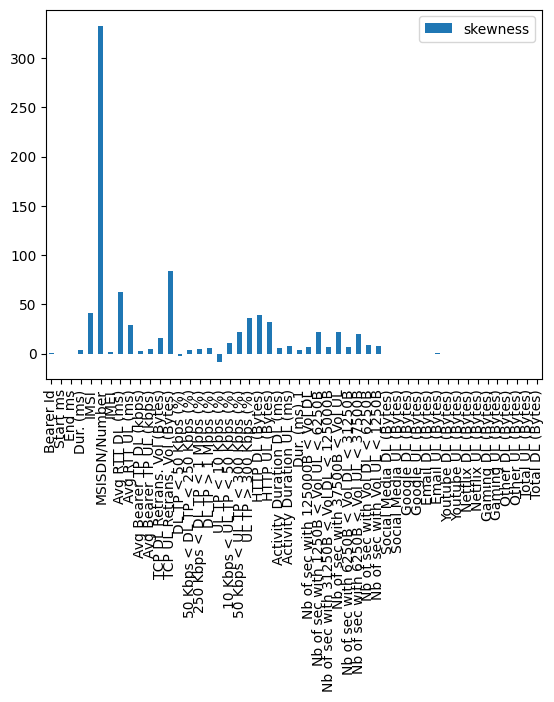

In [60]:
# Exclude non-numeric columns and calculate skewness
import numpy as np
numeric_columns = df.select_dtypes(include=np.number)
skewness = numeric_columns.skew(axis=0, skipna=True)

# Create DataFrame to store skewness values
df_skewness = pd.DataFrame({'skewness': skewness})
df_skewness
df_skewness.plot(kind='bar')

In [61]:
# Create an instance of DataFrameInformation
df_info = DataFrameInformation(df_skewness)

# Call the get_skewness_missing_count method
combined_info = df_info.get_skewness_missing_count(numeric_columns)
print(combined_info)


                                            skewness  Missing Values  \
Nb of sec with 37500B < Vol UL             21.560028        130254.0   
Nb of sec with 6250B < Vol UL < 37500B     19.642752        111843.0   
Nb of sec with 125000B < Vol DL             6.592502         97538.0   
TCP UL Retrans. Vol (Bytes)                84.113393         96649.0   
Nb of sec with 31250B < Vol DL < 125000B    6.610541         93586.0   
Nb of sec with 1250B < Vol UL < 6250B      22.035745         92894.0   
Nb of sec with 6250B < Vol DL < 31250B      6.896050         88317.0   
TCP DL Retrans. Vol (Bytes)                15.951809         88146.0   
HTTP UL (Bytes)                            32.474970         81810.0   
HTTP DL (Bytes)                            38.944710         81474.0   
Avg RTT DL (ms)                            62.907828         27829.0   
Avg RTT UL (ms)                            28.457415         27812.0   
MSISDN/Number                             332.155856          10

<Axes: ylabel='Density'>

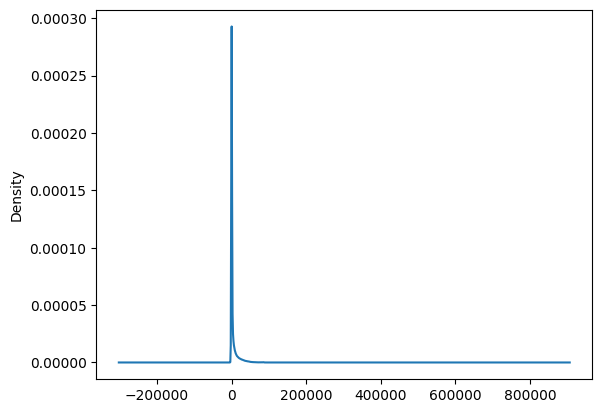

In [62]:
df['Nb of sec with Vol UL < 1250B'].plot(kind='kde')

# Cleaning Data

#using mean median and mode

In [63]:
from scipy.stats.mstats import winsorize
class CleanData:
    def __init__(self,df:pd.DataFrame):
        self.df = df
        logging.basicConfig(filename='../logfile.log', filemode='a',
                            encoding='utf-8', level=logging.DEBUG)
    
    def convert_dtype(self, df: pd.DataFrame, columns, dtype):
        for col in columns:
            df[col] = df[col].astype(dtype=dtype)
        return df
    
    def format_float(self,value):
        return f'{value:,.2f}'

    def convert_bytes_to_megabytes(self, df:pd.DataFrame, columns):

        megabyte = 1*10e+5
        for col in columns:
            df[col] = df[col] / megabyte
        return df
    
    def convert_ms_to_sec(self, df:pd.DataFrame, columns): 
        s = 10e+3
        for col in columns:
            df[col] = df[col] / s
        return df 
    
    def fix_missing_ffill(self, df: pd.DataFrame,col):
        df[col] = df[col].fillna(method='ffill')
        return df[col]
  
    def fix_missing_bfill(self, df: pd.DataFrame, col):
        df[col] = df[col].fillna(method='bfill')
        return df[col]
    
    def drop_column(self, df: pd.DataFrame, columns) -> pd.DataFrame:
        for col in columns:
            df = df.drop([col], axis=1)
        return df

    def drop_missing_count_greaterthan_20p(self,data:pd.DataFrame):
        data_info = DataFrameInformation(data)
        df = data_info.get_skewness_missing_count(data)
        not_fill = df[(df['% of Total Values'] >= 20.0)].index.tolist()
        df_clean = self.drop_column(data, not_fill)
         
        return df_clean
    
    def fill_mode(self, df: pd.DataFrame, columns) -> pd.DataFrame:
        for col in columns:
            df[col] = df[col].fillna(df[col].mode()[0])
        return df

    def fix_outlier(self,df:pd.DataFrame, columns):
        for column in columns:
            df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(), df[column])
            
        return df

    def handle_outliers(self, df: pd.DataFrame,lower,upper):
       
        selected_columns = df.select_dtypes(include='float64').columns
        for col in selected_columns:
            df[col] = winsorize(df[col], (lower, upper))
        return df
    

In [47]:
df_clean = df.copy()
data_cleaner = CleanData(df_clean)

In [64]:
def fix_missing_ffill(df, column):
    """
    Forward fill missing values in the specified column of the DataFrame.

    Parameters:
    - df: DataFrame
    - column: str, the name of the column with missing values

    Returns:
    - None
    """
    df[column] = df[column].ffill()

# Assuming df_clean is your DataFrame
fix_missing_ffill(df_clean, 'End')
fix_missing_ffill(df_clean, 'Start')


In [65]:


# fill  Handset Manufacturer, Handset Type, and last location name

df_clean['Handset Manufacturer'] = df_clean['Handset Manufacturer'].fillna(
    df_clean['Handset Manufacturer'].mode()[0])
df_clean['Handset Type'] = df_clean['Handset Type'].fillna(
    df_clean['Handset Type'].mode()[0])
df_clean['Last Location Name'] = df_clean['Last Location Name'].fillna(
    df_clean['Last Location Name'].mode()[0])
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)

,0
1954,140.918548
563,68.446885
1911,128.642768
819,310.534366
589,2.074645


In [70]:
original_data[0].min(), original_data[0].max()

(0.034485054174505446, 1568.495245733912)

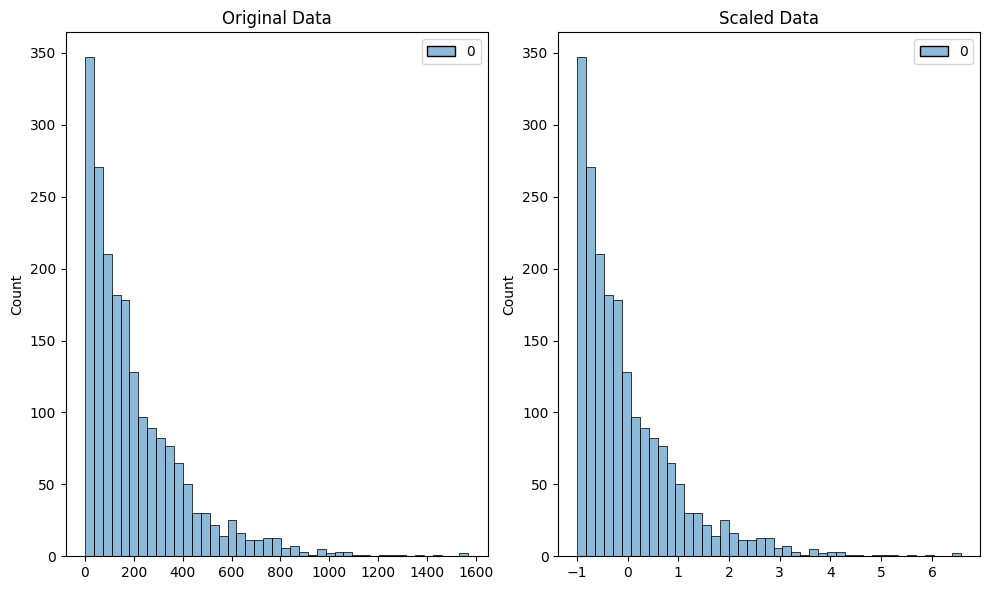

In [72]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def standard_scaler(df):
    s_scaler = StandardScaler()
    scaled_data = s_scaler.fit_transform(df)

    # Create separate figures for the two histograms
    plt.figure(figsize=(10, 6))

    # Plot the histogram for the original data
    plt.subplot(1, 2, 1)
    sns.histplot(df)
    plt.title("Original Data")

    # Plot the histogram for the scaled data
    plt.subplot(1, 2, 2)
    sns.histplot(scaled_data)
    plt.title("Scaled Data")

    # Adjust layout to prevent overlap
    plt.tight_layout()

# Assuming original_data is your DataFrame
standard_scaler(original_data)
plt.show()


In [24]:
pip install --update matplotlib


Note: you may need to restart the kernel to use updated packages.



Usage:   
  c:\Python312\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  c:\Python312\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  c:\Python312\python.exe -m pip install [options] [-e] <vcs project url> ...
  c:\Python312\python.exe -m pip install [options] [-e] <local project path> ...
  c:\Python312\python.exe -m pip install [options] <archive url/path> ...

no such option: --update


In [188]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Min Value:  0.0
Max value:  0.9999999999999999


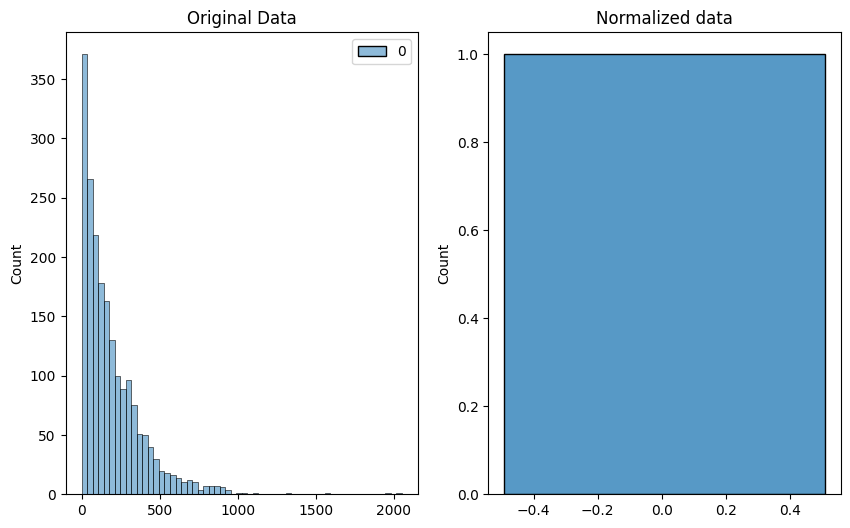

In [25]:
from sklearn.preprocessing import MinMaxScaler
def normalizer(df):
  minmax_scaler = MinMaxScaler()
  tr = minmax_scaler.fit_transform(df)
  print("Min Value: ",tr.min())
  print("Max value: ",tr.max())
  # plot both together to compare
  fig, ax=plt.subplots(1,2, figsize=(10, 6))
  sns.histplot(df, ax=ax[0])
  ax[0].set_title("Original Data")
  sns.histplot(tr[0], ax=ax[1])
  ax[1].set_title("Normalized data")
normalizer(original_data)


all the column with missing values with precent of less than 20 and greater than 0.4 are replaced with mode as they are skewed. however for the 'MSISDN/Number','IMEI' and 'MSI' we cannot do that because it should be unique, there should be no duplicate

In [73]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Filter columns based on conditions related to missing value percentage
fill_mode = missing_percentage[(missing_percentage < 20.0) & (missing_percentage >= 0.4)].index.tolist()
not_fill_mode = ['IMEI', 'IMSI', 'MSISDN/Number']

fill_mode_columns = [x for x in fill_mode if x not in not_fill_mode]



In [74]:
# Check if columns in fill_mode_columns exist in df_clean
columns_to_fill = [col for col in fill_mode_columns if col in df_clean.columns]

# Fill missing values in the selected columns
df_clean[columns_to_fill] = df_clean[columns_to_fill].fillna(df_clean[columns_to_fill].mode().iloc[0])

# Alternatively, you can use the fillna method with a specific value:
# df_clean[columns_to_fill] = df_clean[columns_to_fill].fillna(some_value)

# Check the result
print(df_clean[columns_to_fill].isnull().sum())  # Ensure no missing values remain in these columns

Bearer Id                         0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Nb of sec with Vol DL < 6250B     0
Nb of sec with Vol UL < 1250B     0
dtype: int64


In [75]:
def cap_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series.clip(lower=lower_bound, upper=upper_bound)

In [29]:
missing_info = MissingInformation(df_clean)
mis_val_table_after_clean = missing_info.missing_values_table(df_clean)
mis_val_table_after_clean

,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,130254,86.8,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.6,float64
Nb of sec with 125000B < Vol DL,97538,65.0,float64
TCP UL Retrans. Vol (Bytes),96649,64.4,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.4,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,61.9,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,58.9,float64
TCP DL Retrans. Vol (Bytes),88146,58.8,float64
HTTP UL (Bytes),81810,54.5,float64
HTTP DL (Bytes),81474,54.3,float64


In [77]:
df_clean.dropna(inplace=True)
missing_info = MissingInformation(df_clean)
mis_val_table_after_clean = missing_info.missing_values_table(df_clean)
mis_val_table_after_clean

,Missing Values,percent of Total Values,Dtype


In [78]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17609 entries, 11 to 149990
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Bearer Id                                 17609 non-null  float64
 1   Start                                     17609 non-null  object 
 2   Start ms                                  17609 non-null  float64
 3   End                                       17609 non-null  object 
 4   End ms                                    17609 non-null  float64
 5   Dur. (ms)                                 17609 non-null  float64
 6   IMSI                                      17609 non-null  float64
 7   MSISDN/Number                             17609 non-null  float64
 8   IMEI                                      17609 non-null  float64
 9   Last Location Name                        17609 non-null  object 
 10  Avg RTT DL (ms)                      

In [79]:
#the cleaned data with name clear_data.csv in data directory
df_clean
df_clean.to_csv('Data/clean_data.csv',index=False)

In [80]:
#the clean data can agian be read with this code
df_clean = pd.read_csv('Data/clean_data.csv')
df_clean.shape

(17609, 55)

In [81]:
#extracting damp data
print(df.shape)
df.head(5)

(150001, 55)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

user enagement detail

In [83]:
#lets again read the cleaned data 
#to see the user engagement 
df = pd.read_csv('Data/clean_data.csv')

In [84]:
# finding the session frequency of each user
session_frequency = df['MSISDN/Number'].value_counts()
session_frequency

MSISDN/Number
3.365955e+10    7
3.366552e+10    6
3.369925e+10    6
3.365073e+10    6
3.366258e+10    6
               ..
3.366896e+10    1
3.366377e+10    1
3.366039e+10    1
3.362684e+10    1
3.376127e+10    1
Name: count, Length: 13730, dtype: int64

In [85]:
# Compute session duration for each user
average_session_duration = df.groupby('MSISDN/Number')['Dur. (ms)'].mean()
average_session_duration

MSISDN/Number
3.360101e+10     18555.0
3.360103e+10     55730.0
3.360105e+10     59569.0
3.360106e+10     10532.0
3.360108e+10     26383.0
                  ...   
3.378968e+10    142982.0
3.378991e+10     44199.0
3.378992e+10     54339.0
3.378994e+10     36812.0
3.378998e+10     31864.0
Name: Dur. (ms), Length: 13730, dtype: float64

In [86]:
# Calculate total traffic (download and upload) for each user
df['Total_Traffic'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']
total_traffic_per_user = df.groupby('MSISDN/Number')['Total_Traffic'].sum()
total_traffic_per_user

MSISDN/Number
3.360101e+10    871832580.0
3.360103e+10    637053075.0
3.360105e+10    445397764.0
3.360106e+10    769716233.0
3.360108e+10    458958083.0
                   ...     
3.378968e+10    344502149.0
3.378991e+10    902088414.0
3.378992e+10    576824365.0
3.378994e+10    193917233.0
3.378998e+10    371655648.0
Name: Total_Traffic, Length: 13730, dtype: float64

In [87]:
# Combine the metrics into a single DataFrame
engagement_metrics = pd.DataFrame({
    'Session_Frequency': session_frequency,
    'Average_Session_Duration': average_session_duration,
    'Total_Traffic': total_traffic_per_user
}).reset_index()

# Display or use the resulting engagement metrics DataFrame
engagement_metrics.head()

,MSISDN/Number,Session_Frequency,Average_Session_Duration,Total_Traffic
0,3.360101e+10,1,18555.0,871832580.0
1,3.360103e+10,1,55730.0,637053075.0
2,3.360105e+10,1,59569.0,445397764.0
3,3.360106e+10,1,10532.0,769716233.0
4,3.360108e+10,1,26383.0,458958083.0


In [88]:
#top ten customers by session
top_10_session_frequency = engagement_metrics.nlargest(10, 'Session_Frequency')
top_10_session_frequency

,MSISDN/Number,Session_Frequency,Average_Session_Duration,Total_Traffic
3970,3.365955e+10,7,270955.428571,4.612115e+09
2209,3.365073e+10,6,85649.833333,3.734279e+09
2681,3.365813e+10,6,85949.833333,3.574785e+09
5116,3.366130e+10,6,86157.500000,2.970554e+09
5415,3.366180e+10,6,86399.166667,3.725833e+09
5916,3.366258e+10,6,86399.500000,3.727879e+09
7256,3.366518e+10,6,86399.000000,3.376239e+09
7526,3.366552e+10,6,84880.333333,2.608953e+09
7700,3.366578e+10,6,92638.166667,3.129471e+09
10446,3.369844e+10,6,82931.666667,2.881097e+09


In [89]:
#top ten customers by duration
top_10_avg_duration = engagement_metrics.nlargest(10, 'Average_Session_Duration')
top_10_avg_duration

,MSISDN/Number,Session_Frequency,Average_Session_Duration,Total_Traffic
10592,3.369870e+10,1,1.382408e+06,4.693671e+08
6855,3.366447e+10,1,8.898340e+05,5.688098e+08
937,3.362578e+10,1,6.490300e+05,6.454359e+08
2812,3.365826e+10,1,6.020490e+05,7.062233e+07
10441,3.369843e+10,1,5.933290e+05,4.440213e+08
6057,3.366284e+10,3,5.428237e+05,1.146194e+09
8256,3.366707e+10,1,5.394940e+05,5.078814e+08
4083,3.365969e+10,2,4.855575e+05,1.067762e+09
9195,3.366893e+10,5,4.738546e+05,2.772479e+09
70,3.360313e+10,1,4.688320e+05,4.006901e+08


In [90]:
#top ten customers by total traffic 
top_10_total_traffic = engagement_metrics.nlargest(10, 'Total_Traffic')
top_10_total_traffic

,MSISDN/Number,Session_Frequency,Average_Session_Duration,Total_Traffic
3970,3.365955e+10,7,270955.428571,4.612115e+09
10842,3.369925e+10,6,85928.833333,3.752679e+09
2209,3.365073e+10,6,85649.833333,3.734279e+09
5916,3.366258e+10,6,86399.500000,3.727879e+09
5415,3.366180e+10,6,86399.166667,3.725833e+09
9488,3.366969e+10,5,86399.200000,3.584549e+09
2681,3.365813e+10,6,85949.833333,3.574785e+09
10808,3.369917e+10,5,86399.000000,3.531055e+09
12787,3.376357e+10,5,86399.200000,3.482434e+09
3600,3.365913e+10,5,86399.400000,3.471069e+09


In [133]:
# Normalize engagement metrics and K-MEANS CLASTURING
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics.drop('MSISDN/Number', axis=1))
normalized_metrics

array([[0.        , 0.00758941, 0.18228976],
       [0.        , 0.03463988, 0.13096165],
       [0.        , 0.03743334, 0.08906147],
       ...,
       [0.        , 0.03362772, 0.11779429],
       [0.        , 0.02087416, 0.03408214],
       [0.        , 0.01727373, 0.07293978]])

# Run K-Means clustering with k=3
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
engagement_metrics['Cluster'] = kmeans.fit_predict(normalized_metrics)
# Compute statistics for each cluster
cluster_stats = engagement_metrics.groupby('Cluster').agg({
    'Session_Frequency': ['min', 'max', 'mean', 'sum'],
    'Average_Session_Duration': ['min', 'max', 'mean', 'sum'],
    'Total_Traffic': ['min', 'max', 'mean', 'sum']
}).reset_index()
cluster_stats

In [134]:
# Aggregate user total traffic per application
app_traffic = df.groupby('MSISDN/Number')[['Social Media DL (Bytes)', 'Google DL (Bytes)', 
                                             'Email DL (Bytes)', 'Youtube DL (Bytes)',
                                             'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 
                                             'Other DL (Bytes)']].sum()
app_traffic

,Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes)
MSISDN/Number,,,,,,,
3.360101e+10,1501326.0,7419606.0,1267949.0,2312338.0,3794492.0,799737769.0,72295238.0
3.360103e+10,1464003.0,8751405.0,2814694.0,365747.0,2706775.0,580027299.0,738914857.0
3.360105e+10,1973795.0,3669004.0,405822.0,2451702.0,22322256.0,357168364.0,413786536.0
3.360106e+10,2130252.0,4455292.0,2063426.0,9929214.0,19038642.0,706837918.0,350048157.0
3.360108e+10,3002060.0,4140891.0,2188124.0,17616699.0,22796500.0,353084094.0,96875655.0
...,...,...,...,...,...,...,...
3.378968e+10,3295397.0,6431484.0,919718.0,5562036.0,7819446.0,277967415.0,470040506.0
3.378991e+10,3489622.0,11076131.0,2988025.0,4706637.0,19410574.0,821261401.0,161249835.0
3.378992e+10,2362158.0,8926384.0,329964.0,4765077.0,6782568.0,519920905.0,521441380.0


In [135]:
# Calculate total traffic per user for each application
app_traffic['Total_App_Traffic'] = app_traffic.sum(axis=1)

In [136]:
#top ten engaging users per social media
top_10_social_media = app_traffic.nlargest(10, 'Social Media DL (Bytes)')
top_10_social_media

,Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes),Total_App_Traffic
MSISDN/Number,,,,,,,,
3.366258e+10,15856187.0,33702351.0,12504906.0,42824644.0,91301512.0,3.285899e+09,2.782042e+09,6.264131e+09
3.365955e+10,15520801.0,39384940.0,11436507.0,89399329.0,73507632.0,4.078590e+09,2.747567e+09,7.055407e+09
3.365816e+10,15335525.0,40739093.0,6462676.0,58109266.0,60501537.0,1.553260e+09,1.798936e+09,3.533344e+09
3.366773e+10,14538628.0,26328372.0,10683179.0,54190578.0,75496945.0,1.786850e+09,1.727512e+09,3.695600e+09
3.366552e+10,14192876.0,43241136.0,14007755.0,77210030.0,81450750.0,2.155579e+09,2.302097e+09,4.687778e+09
3.376387e+10,13343848.0,28290693.0,10474225.0,69057676.0,51880719.0,1.293833e+09,2.013428e+09,3.480309e+09
3.369844e+10,13312800.0,37869476.0,13148919.0,53010042.0,89271175.0,2.375139e+09,2.455660e+09,5.037411e+09
3.366642e+10,13171166.0,23653133.0,11242938.0,75756629.0,67595440.0,2.405421e+09,2.027401e+09,4.624242e+09
3.365813e+10,13086304.0,27702177.0,15574842.0,67743259.0,78801820.0,3.133472e+09,2.949326e+09,6.285706e+09


In [137]:
#top ten most engaing users in google 
top_10_google = app_traffic.nlargest(10, 'Google DL (Bytes)')
top_10_google

,Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes),Total_App_Traffic
MSISDN/Number,,,,,,,,
3.365073e+10,8653608.0,51843617.0,8881650.0,57391260.0,73905029.0,3.349406e+09,1.684790e+09,5.234871e+09
3.366015e+10,5825889.0,48074696.0,8947505.0,68495333.0,48560717.0,2.871009e+09,2.024617e+09,5.075530e+09
3.366893e+10,8960135.0,44776474.0,6409142.0,47215581.0,42691581.0,2.391018e+09,2.376712e+09,4.917783e+09
3.366887e+10,10550178.0,43549505.0,11292165.0,31228587.0,59524105.0,1.779671e+09,1.773344e+09,3.709160e+09
3.376357e+10,8823282.0,43327741.0,8645915.0,54914611.0,65431912.0,3.090514e+09,2.177050e+09,5.448707e+09
3.366552e+10,14192876.0,43241136.0,14007755.0,77210030.0,81450750.0,2.155579e+09,2.302097e+09,4.687778e+09
3.369925e+10,11344352.0,42628242.0,12389580.0,58717785.0,62665551.0,3.334335e+09,3.454775e+09,6.976855e+09
3.376125e+10,9367400.0,42313734.0,4686225.0,38519966.0,59202677.0,2.444914e+09,2.792571e+09,5.391576e+09
3.366058e+10,6032192.0,42100619.0,10550032.0,42268003.0,45089977.0,1.411647e+09,1.289552e+09,2.847240e+09


In [138]:
#top ten engaging users in youtube
top_10_youtube = app_traffic.nlargest(10, 'Youtube DL (Bytes)')
top_10_youtube 


,Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes),Total_App_Traffic
MSISDN/Number,,,,,,,,
3.376354e+10,12940091.0,36404951.0,9610340.0,93601269.0,83384654.0,2.942518e+09,2.165293e+09,5.343753e+09
3.365052e+10,5974593.0,28611657.0,11604532.0,92566139.0,34629226.0,2.694484e+09,2.604909e+09,5.472779e+09
3.366130e+10,10136727.0,22345490.0,10692711.0,90202912.0,84357867.0,2.486797e+09,2.395958e+09,5.100491e+09
3.365955e+10,15520801.0,39384940.0,11436507.0,89399329.0,73507632.0,4.078590e+09,2.747567e+09,7.055407e+09
3.366569e+10,8510835.0,18322175.0,9357639.0,88263552.0,55384357.0,2.382397e+09,2.965805e+09,5.528040e+09
3.376155e+10,7891746.0,19754201.0,8078497.0,87714631.0,76787250.0,1.729795e+09,1.587886e+09,3.517907e+09
3.366376e+10,9784217.0,20871018.0,7004470.0,85795720.0,49804247.0,2.139705e+09,2.415142e+09,4.728106e+09
3.376011e+10,7912818.0,32052383.0,4185099.0,85762923.0,21608466.0,2.753002e+09,2.438069e+09,5.342592e+09
3.369990e+10,4388393.0,32163093.0,9135835.0,82585431.0,40196292.0,2.078288e+09,3.332641e+09,5.579398e+09


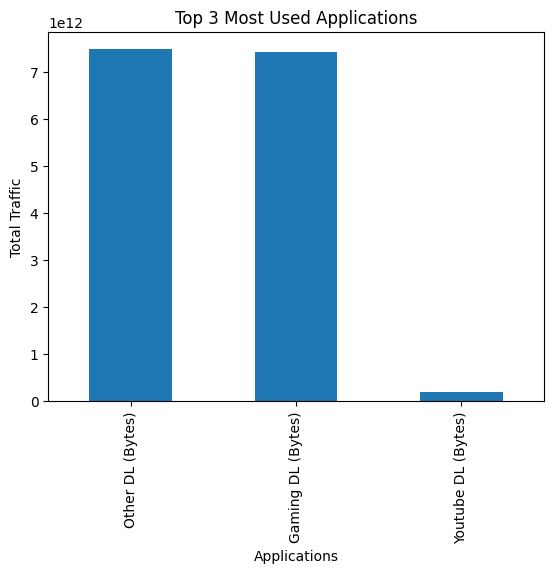

In [139]:
# Calculate total traffic per application across all users
total_app_traffic = app_traffic.drop('Total_App_Traffic', axis=1).sum()

# Plot top 3 most used applications
top_3_apps = total_app_traffic.nlargest(3)
top_3_apps.plot(kind='bar', xlabel='Applications', ylabel='Total Traffic', title='Top 3 Most Used Applications')
plt.show()

c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

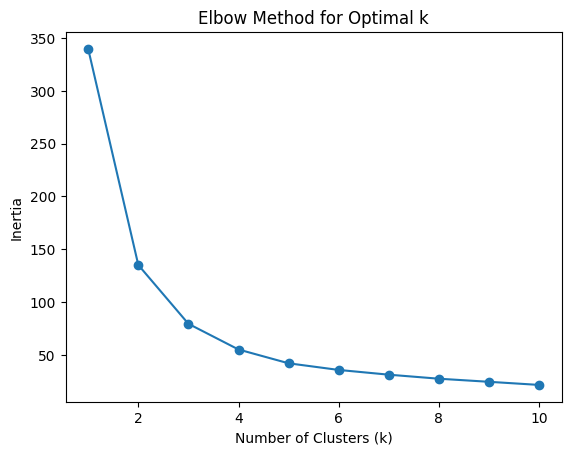

In [140]:
# Elbow method to find optimized k value
from sklearn.cluster import KMeans
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_metrics)
    inertia_values.append(kmeans.inertia_)

# Plot inertia values for different k values
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [141]:
#finding user experience of each user in the database 
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [142]:
#lets select some of the columns 
selected_columns = [
    'MSISDN/Number',
    'TCP DL Retrans. Vol (Bytes)',
    'TCP UL Retrans. Vol (Bytes)',
    'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
    'Avg Bearer TP UL (kbps)', 'Avg Bearer TP DL (kbps)',
    'Handset Type']

In [143]:
selected_df = df[selected_columns]
selected_df

,MSISDN/Number,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP UL (kbps),Avg Bearer TP DL (kbps),Handset Type
0,3.366447e+10,5722628.0,312007.0,217.0,4.0,6500.0,28305.0,Huawei B593S-22
1,3.365875e+10,9844005.0,21586.0,409.0,43.0,10557.0,29501.0,Huawei E5180
2,3.366274e+10,765968.0,31267.0,853.0,2.0,10147.0,11517.0,Samsung Galaxy A8 (2018)
3,3.366917e+10,593180.0,64919.0,91.0,24.0,8032.0,54827.0,Samsung Galaxy S9 Plus (Sm-G965F)
4,3.366555e+10,13296131.0,16627.0,64.0,16.0,3169.0,26410.0,Huawei B528S-23A
...,...,...,...,...,...,...,...,...
17604,3.366396e+10,29215591.0,255965.0,748.0,29.0,8845.0,42875.0,Huawei B528S-23A
17605,3.366513e+10,4242519.0,69408.0,52.0,61.0,9680.0,23946.0,Huawei B528S-23A
17606,3.365069e+10,646785.0,42122.0,303.0,13.0,7028.0,54170.0,undefined
17607,3.366856e+10,661409.0,35693.0,49.0,39.0,14822.0,34972.0,Huawei E5180


In [144]:
# Replace missing values with the mean for numerical columns (TCP retransmission, RTT, throughput)
numeric_columns = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
                   'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
                   'Avg Bearer TP UL (kbps)', 'Avg Bearer TP DL (kbps)']

for col in numeric_columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Replace missing handset type values with the mode (most frequent)
df['Handset Type'].fillna(df['Handset Type'].mode()[0], inplace=True)

# Aggregate information per customer
aggregated_data = df.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',
    'Handset Type': lambda x: x.mode()[0]  # Get the most frequent handset type per customer
}).reset_index()

# Displaying the aggregated data
aggregated_data


,MSISDN/Number,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP UL (kbps),Avg Bearer TP DL (kbps),Handset Type
0,3.360101e+10,9349630.0,21202.0,86.0,5.0,16409.0,40372.0,Apple iPhone Se (A1723)
1,3.360103e+10,2251948.0,73549.0,32.0,28.0,3508.0,34682.0,Apple iPhone 8 Plus (A1897)
2,3.360105e+10,7726458.0,77103.0,218.0,33.0,4958.0,51392.0,Samsung Galaxy Note 8 (Sm-N950F)
3,3.360106e+10,1831411.0,5320.0,48.0,7.0,4239.0,42192.0,Samsung Galaxy S8 (Sm-G950F)
4,3.360108e+10,2305944.0,1274.0,39.0,5.0,41451.0,66907.0,Apple iPhone Xs (A2097)
...,...,...,...,...,...,...,...,...
13725,3.378968e+10,459884.0,11477.0,61.0,6.0,5983.0,9896.0,Huawei P20 Lite Huawei Nova 3E
13726,3.378991e+10,126155.0,22684.0,56.0,11.0,16301.0,43852.0,Samsung Galaxy S9 Plus (Sm-G965F)
13727,3.378992e+10,1203027.0,26518.0,78.0,50.0,5948.0,37357.0,Samsung Galaxy S7 Edge (Sm-G935X)
13728,3.378994e+10,2714043.0,89961.0,39.0,13.0,10953.0,130359.0,Samsung Galaxy S9 Sm-G960F Ds


In [145]:
# Top, bottom, and most frequent values for TCP, RTT, and Throughput lebelled as top_10_tcp, top_10_rtt, top_10_throughput
top_10_TCP = df['TCP DL Retrans. Vol (Bytes)'].nlargest(10)
bottom_10_TCP = df['TCP DL Retrans. Vol (Bytes)'].nsmallest(10)
most_frequent_TCP = df['TCP DL Retrans. Vol (Bytes)'].value_counts().head(10)

top_10_RTT = df['Avg RTT DL (ms)'].nlargest(10)
bottom_10_RTT = df['Avg RTT DL (ms)'].nsmallest(10)
most_frequent_RTT = df['Avg RTT DL (ms)'].value_counts().head(10)

top_10_throughput = df['Avg Bearer TP DL (kbps)'].nlargest(10)
bottom_10_throughput = df['Avg Bearer TP DL (kbps)'].nsmallest(10)
most_frequent_throughput = df['Avg Bearer TP DL (kbps)'].value_counts().head(10)

In [146]:

top_10_TCP

14769    4.291380e+09
3195     4.289877e+09
16409    4.289488e+09
1170     4.288060e+09
13384    4.275259e+09
5231     4.254644e+09
130      4.131046e+09
15777    4.117753e+09
14223    4.093164e+09
16455    4.027390e+09
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

In [147]:
bottom_10_TCP

2851     35.0
1242     38.0
1738     38.0
1847     38.0
2880     38.0
4425     38.0
12083    38.0
12796    38.0
14345    38.0
2682     42.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

In [148]:
most_frequent_TCP

TCP DL Retrans. Vol (Bytes)
2660.0    13
1330.0     9
38.0       8
76.0       5
92.0       5
46.0       4
543.0      4
276.0      4
1514.0     3
1422.0     3
Name: count, dtype: int64

In [149]:
top_10_RTT

11384    16565.0
5609     10519.0
11448     7866.0
3057      4869.0
17301     3813.0
8711      3388.0
2014      3342.0
12782     3215.0
15978     2936.0
10185     2575.0
Name: Avg RTT DL (ms), dtype: float64

In [150]:
bottom_10_RTT

9286     17.0
3186     18.0
13875    18.0
14302    18.0
14460    18.0
14645    18.0
2787     19.0
2811     19.0
3073     19.0
3924     19.0
Name: Avg RTT DL (ms), dtype: float64

In [151]:
most_frequent_TCP

TCP DL Retrans. Vol (Bytes)
2660.0    13
1330.0     9
38.0       8
76.0       5
92.0       5
46.0       4
543.0      4
276.0      4
1514.0     3
1422.0     3
Name: count, dtype: int64

In [152]:
top_10_RTT

11384    16565.0
5609     10519.0
11448     7866.0
3057      4869.0
17301     3813.0
8711      3388.0
2014      3342.0
12782     3215.0
15978     2936.0
10185     2575.0
Name: Avg RTT DL (ms), dtype: float64

In [153]:
bottom_10_RTT

9286     17.0
3186     18.0
13875    18.0
14302    18.0
14460    18.0
14645    18.0
2787     19.0
2811     19.0
3073     19.0
3924     19.0
Name: Avg RTT DL (ms), dtype: float64

In [154]:
most_frequent_RTT

Avg RTT DL (ms)
52.0    311
49.0    288
44.0    286
53.0    281
57.0    277
61.0    276
50.0    274
46.0    272
60.0    272
59.0    271
Name: count, dtype: int64

In [155]:
top_10_throughput

13744    378160.0
16528    299257.0
17114    299002.0
10775    269362.0
12834    266332.0
12271    265440.0
12476    263047.0
5345     254253.0
14507    251660.0
10666    246514.0
Name: Avg Bearer TP DL (kbps), dtype: float64

In [156]:
bottom_10_throughput

17265    5242.0
10199    5254.0
11880    5260.0
13018    5344.0
7695     5372.0
2513     5400.0
6813     5401.0
3816     5452.0
1948     5458.0
12936    5464.0
Name: Avg Bearer TP DL (kbps), dtype: float64

In [157]:
most_frequent_throughput

Avg Bearer TP DL (kbps)
39981.0    5
17448.0    4
21419.0    4
26401.0    4
25120.0    4
49520.0    4
44955.0    4
31277.0    3
31777.0    3
72730.0    3
Name: count, dtype: int64

In [158]:
#I am going to read the csv file extracted from the telecom database
clean_data = pd.read_csv('Data/clean_data.csv')
clean_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/15/2019 11:33,626.0,4/25/2019 18:44,542.0,889834.0,2.082019e+14,3.366447e+10,8.600910e+13,T21335C,...,2805710.0,16817598.0,18094847.0,2029991.0,504604946.0,1063672.0,526987098.0,11382619.0,33691738.0,535118044.0
1,1.304243e+19,4/17/2019 0:35,363.0,4/25/2019 4:52,691.0,706649.0,2.082010e+14,3.365875e+10,8.654080e+13,T29714B,...,15782415.0,9688165.0,18625220.0,14679856.0,373953102.0,574875.0,161357015.0,134689.0,26026033.0,422406937.0
2,1.304243e+19,4/21/2019 10:09,1.0,4/25/2019 1:39,272.0,314961.0,2.082014e+14,3.366274e+10,3.528141e+13,T72937C,...,22191188.0,18851898.0,15879318.0,10650621.0,48891264.0,13607386.0,525208955.0,6472727.0,50576233.0,93360974.0
3,1.304243e+19,4/21/2019 19:35,344.0,4/25/2019 2:59,259.0,285833.0,2.082018e+14,3.366917e+10,3.566261e+13,L41432B,...,14655680.0,26061.0,5444485.0,17740302.0,164451149.0,6446720.0,415002189.0,4883208.0,32643783.0,193656366.0
4,1.304243e+19,4/22/2019 1:17,301.0,4/25/2019 1:17,938.0,259201.0,2.082014e+14,3.366555e+10,8.637690e+13,T85779A,...,69288.0,19177045.0,10783199.0,8000048.0,496879416.0,1530545.0,247233250.0,1175435.0,33314765.0,519351173.0


In [159]:
#get name of columns
clean_data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


348 users
Number of posts per user


<Axes: xlabel='Handset Type'>

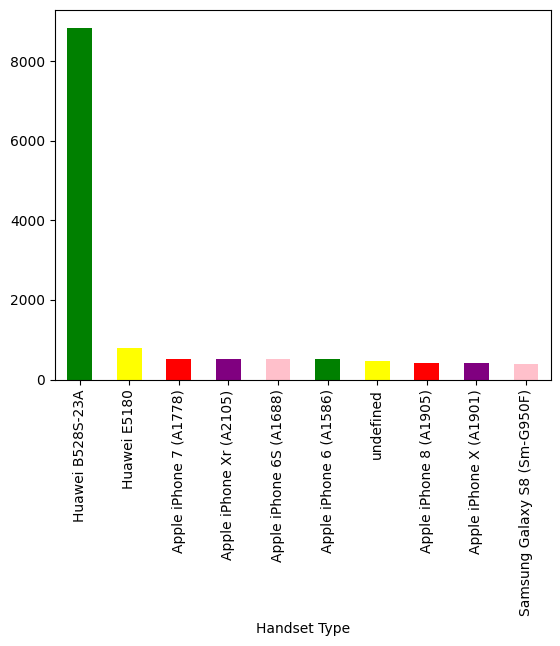

In [160]:
#top ten handseets used by the customer
handset_count = clean_data['Handset Type'].value_counts()
print(len(handset_count), "users")
print("Number of posts per user")
handset_count[:10].plot(kind='bar', color=['green', 'yellow', 'red','purple','pink'])

46 users
Number of posts per user


<Axes: xlabel='Handset Manufacturer'>

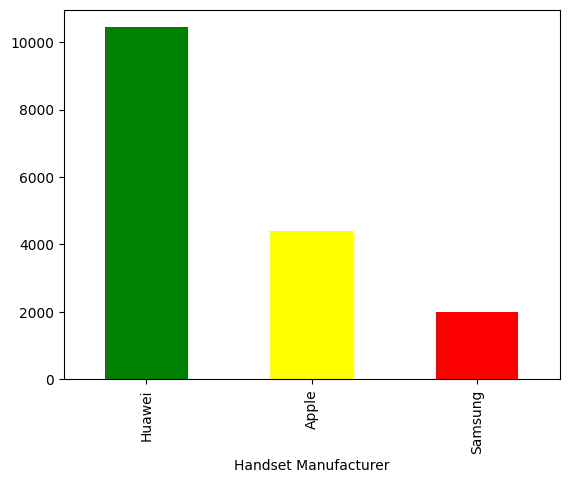

In [161]:
#top three handset manufacturer
handset_manufacturer = clean_data['Handset Manufacturer'].value_counts()
print(len(handset_manufacturer), "users")
print("Number of posts per user")
handset_manufacturer[:3].plot(
    kind='bar', color=['green', 'yellow', 'red'])

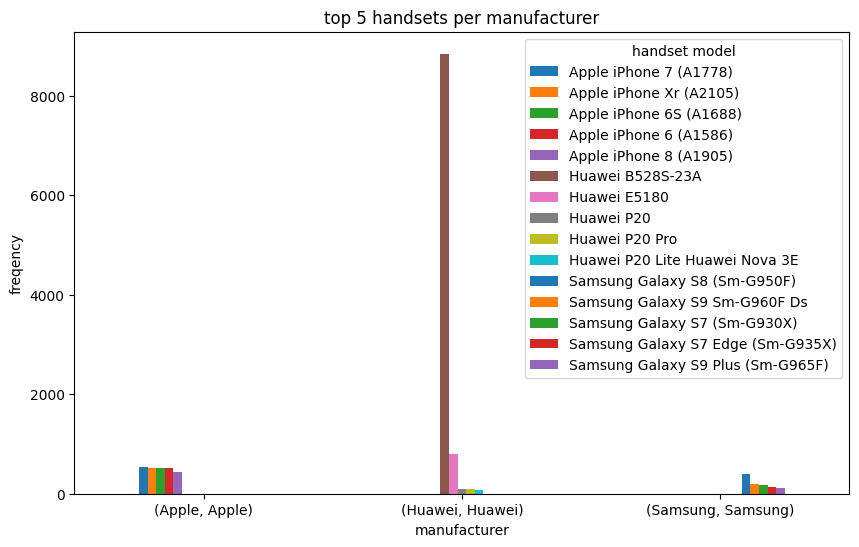

In [162]:
# the top 5 handsets for each of the top 3 handset manufacturer
manufacturer_counts = clean_data['Handset Manufacturer'].value_counts()

top_3_manufacturers = manufacturer_counts.head(3).index

filtered_df = clean_data[clean_data['Handset Manufacturer'].isin(top_3_manufacturers)]

handset_counts = filtered_df.groupby(['Handset Manufacturer','Handset Type']).size()

top_5_handsets = handset_counts.groupby('Handset Manufacturer').nlargest(5)


top_5_handsets.unstack().plot(kind='bar', figsize=(10,6))
plt.title('top 5 handsets per manufacturer')
plt.xlabel('manufacturer')
plt.ylabel('freqency')
plt.xticks(rotation=0)
plt.legend(title = 'handset model')
plt.show()

<Axes: xlabel='Handset Manufacturer,Handset Type'>

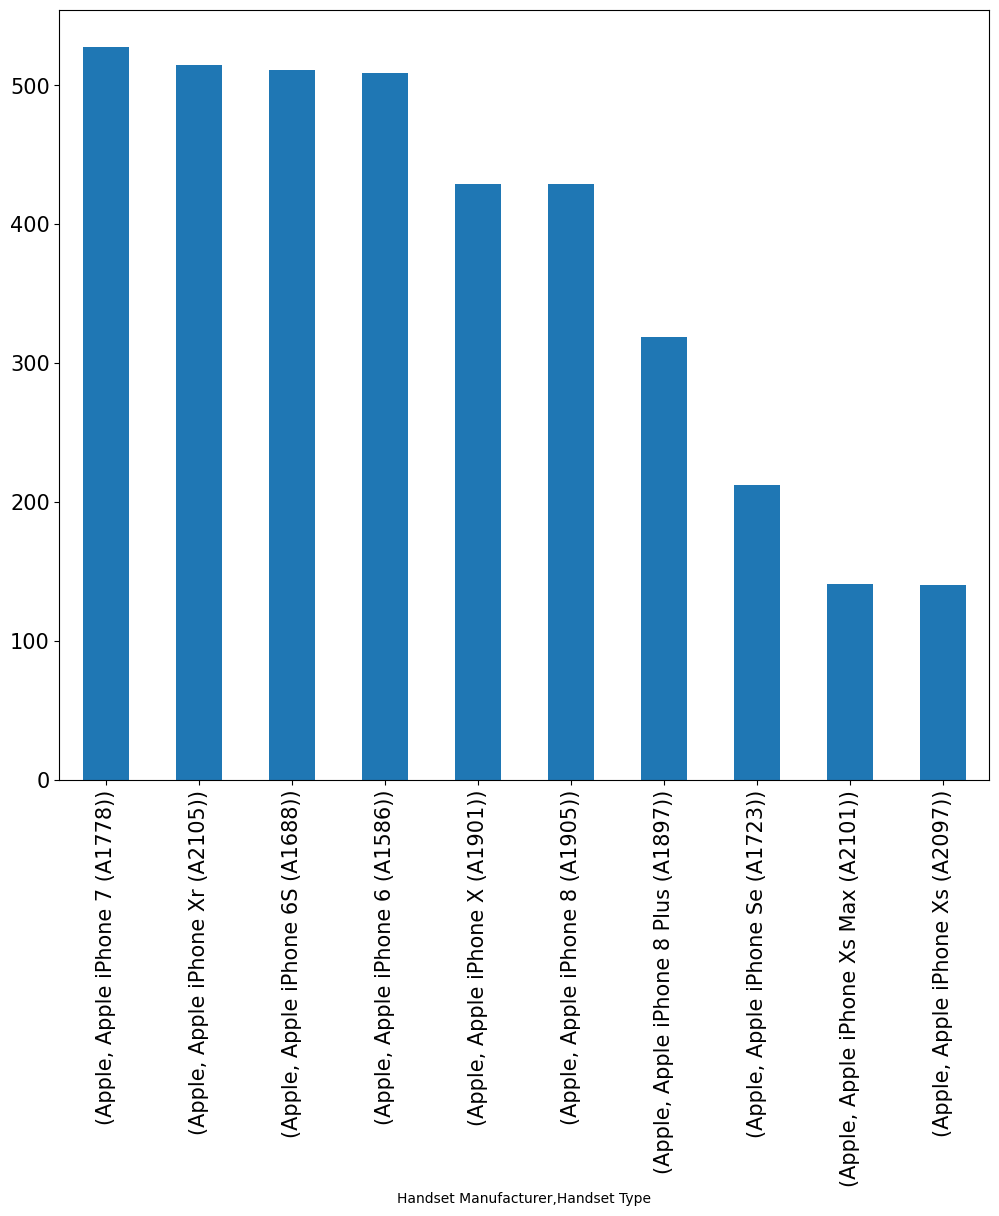

In [163]:
handset_man= clean_data[clean_data['Handset Manufacturer'].isin(['Apple','Sumsung','Huawei'])]
handset_man.groupby('Handset Manufacturer')['Handset Type'].value_counts()[:10].plot.bar(
    figsize=(12, 10), fontsize=15)

In [164]:
# Grouping data per user and aggregating metrics
aggregated_data = clean_data.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'count',  # Counting the number of sessions
    'Dur. (ms)': 'sum',  # Total session duration
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()
aggregated_data.head()  # Display the first few rows

,MSISDN/Number,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
0,3.360101e+10,18555.0,55799100.0,816033480.0,1501326.0,22731.0,7419606.0,2751029.0,1267949.0,145736.0,2312338.0,18180144.0,3794492.0,18178618.0,799737769.0,2827420.0,72295238.0,13693422.0
1,3.360103e+10,55730.0,40923152.0,596129923.0,1464003.0,39350.0,8751405.0,3572533.0,2814694.0,99250.0,365747.0,6914089.0,2706775.0,10502086.0,580027299.0,5966738.0,738914857.0,13829106.0
2,3.360105e+10,59569.0,57406821.0,387990943.0,1973795.0,44377.0,3669004.0,1387115.0,405822.0,168797.0,2451702.0,17685378.0,22322256.0,19154702.0,357168364.0,11570899.0,413786536.0,7395553.0
3,3.360106e+10,10532.0,25261489.0,744454744.0,2130252.0,56023.0,4455292.0,577195.0,2063426.0,40978.0,9929214.0,754003.0,19038642.0,16987699.0,706837918.0,2017122.0,350048157.0,4828469.0
4,3.360108e+10,26383.0,56129715.0,402828368.0,3002060.0,29691.0,4140891.0,2862385.0,2188124.0,316975.0,17616699.0,4232106.0,22796500.0,21445172.0,353084094.0,11097674.0,96875655.0,16145712.0


In [165]:
#summerzing the matrix or anlysing the basic matrix
summary_stats = clean_data.describe()
summary_stats

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.760900e+04,17609.000000,17609.000000,1.760900e+04,1.760900e+04,1.760900e+04,1.760900e+04,17609.000000,17609.000000,17609.000000,...,1.760900e+04,1.760900e+04,1.760900e+04,1.760900e+04,1.760900e+04,1.760900e+04,1.760900e+04,1.760900e+04,1.760900e+04,1.760900e+04
mean,1.064177e+19,498.800670,499.487932,8.203468e+04,2.082016e+14,3.368052e+10,6.649923e+13,96.177807,28.452496,48820.928332,...,1.171951e+07,1.104697e+07,1.168381e+07,1.106905e+07,4.218192e+08,8.317074e+06,4.248345e+08,8.225370e+06,4.121673e+07,4.545531e+08
std,2.846815e+18,290.305277,287.742812,4.506303e+04,1.017239e+09,4.377922e+07,2.482448e+13,209.903777,61.764325,29856.785560,...,6.738351e+06,6.352393e+06,6.707407e+06,6.321570e+06,2.454933e+08,4.796810e+06,2.414997e+08,4.763197e+06,1.125973e+07,2.456431e+08
min,6.917538e+18,0.000000,0.000000,8.125000e+03,2.082001e+14,3.360101e+10,1.341200e+12,17.000000,1.000000,5242.000000,...,1.156000e+03,2.970000e+02,9.640000e+02,2.430000e+02,6.859400e+04,7.900000e+01,5.995600e+04,2.150000e+02,4.661082e+06,7.114041e+06
25%,7.277826e+18,248.000000,252.000000,7.359900e+04,2.082014e+14,3.365918e+10,3.572831e+13,47.000000,7.000000,28362.000000,...,5.864711e+06,5.525641e+06,5.867576e+06,5.608611e+06,2.073397e+08,4.134039e+06,2.176147e+08,4.145102e+06,3.325070e+07,2.397505e+08
50%,1.304243e+19,500.000000,499.000000,8.639900e+04,2.082017e+14,3.366468e+10,8.637690e+13,64.000000,20.000000,42704.000000,...,1.177978e+07,1.102313e+07,1.171929e+07,1.104902e+07,4.225888e+08,8.298346e+06,4.274525e+08,8.179610e+06,4.125821e+07,4.540909e+08
75%,1.304243e+19,750.000000,748.000000,8.639900e+04,2.082018e+14,3.369825e+10,8.637690e+13,94.000000,33.000000,61387.000000,...,1.761455e+07,1.655330e+07,1.748707e+07,1.651942e+07,6.350792e+08,1.248571e+07,6.329240e+08,1.233370e+07,4.901568e+07,6.678034e+08
max,1.318654e+19,999.000000,999.000000,1.382408e+06,2.082099e+14,3.378998e+10,9.900120e+13,16565.000000,4226.000000,378160.000000,...,2.325735e+07,2.201182e+07,2.325883e+07,2.201196e+07,8.434419e+08,1.655680e+07,8.434085e+08,1.655877e+07,7.660707e+07,8.992126e+08


In [166]:
#non graphical univariant analysis
# Dispersion parameters for quantitative variables
dispersion_params = clean_data[['Total UL (Bytes)', 'Total DL (Bytes)', 'Social Media DL (Bytes)', 
                          'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)',
                          'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']].std()
dispersion_params

Total UL (Bytes)           1.125973e+07
Total DL (Bytes)           2.456431e+08
Social Media DL (Bytes)    1.033395e+06
Google DL (Bytes)          3.303474e+06
Email DL (Bytes)           1.040610e+06
Youtube DL (Bytes)         6.738351e+06
Netflix DL (Bytes)         6.707407e+06
Gaming DL (Bytes)          2.454933e+08
Other DL (Bytes)           2.414997e+08
dtype: float64

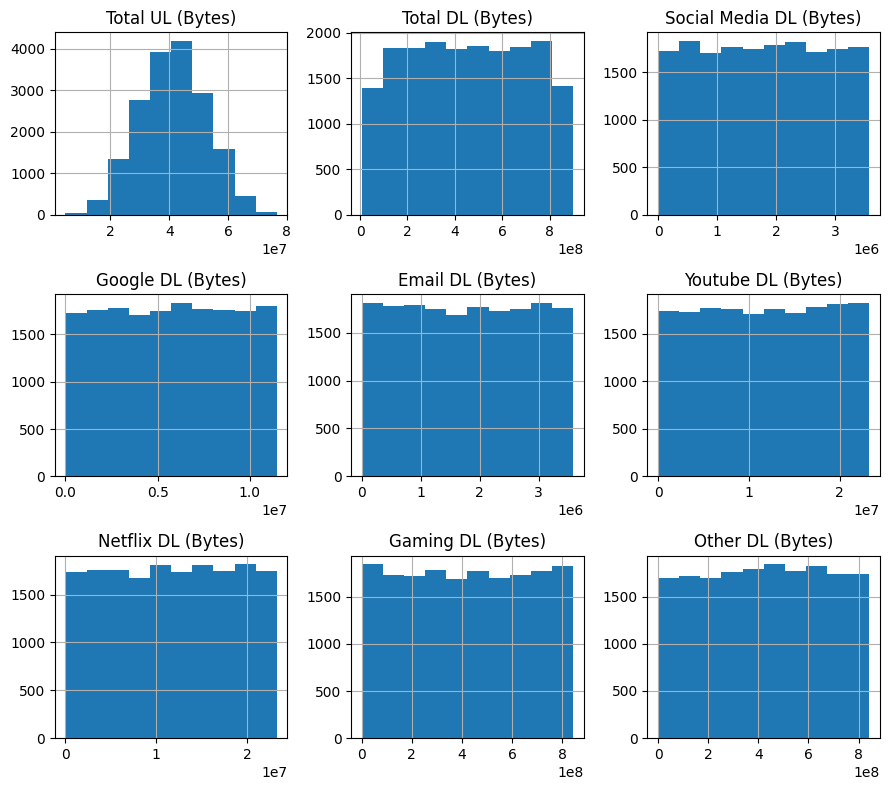

In [167]:
# Histograms for selected variables
clean_data[['Total UL (Bytes)', 'Total DL (Bytes)', 'Social Media DL (Bytes)', 
      'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)',
      'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']].hist(figsize=(9, 8))
plt.tight_layout()
plt.show()

In [168]:
#bi variat analysis 
# Relationship between each application and total DL+UL data
app_vs_total_data = clean_data[['Total UL (Bytes)', 'Total DL (Bytes)', 'Social Media DL (Bytes)', 
                          'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)',
                          'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']].corr()
app_vs_total_data

,Total UL (Bytes),Total DL (Bytes),Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes)
Total UL (Bytes),1.000000,-0.008275,0.005616,0.006742,0.009213,0.005076,-0.009676,-0.008308,-0.004143
Total DL (Bytes),-0.008275,1.000000,0.006780,0.022464,-0.002447,0.022414,0.019161,0.999151,-0.001034
Social Media DL (Bytes),0.005616,0.006780,1.000000,0.004368,0.006034,-0.002914,-0.000027,0.002571,0.012174
Google DL (Bytes),0.006742,0.022464,0.004368,1.000000,0.006542,-0.004565,-0.014158,0.009488,-0.003888
Email DL (Bytes),0.009213,-0.002447,0.006034,0.006542,1.000000,-0.000210,0.012355,-0.007133,0.002814
Youtube DL (Bytes),0.005076,0.022414,-0.002914,-0.004565,-0.000210,1.000000,-0.004719,-0.004817,0.018297
Netflix DL (Bytes),-0.009676,0.019161,-0.000027,-0.014158,0.012355,-0.004719,1.000000,-0.007882,0.005790
Gaming DL (Bytes),-0.008308,0.999151,0.002571,0.009488,-0.007133,-0.004817,-0.007882,1.000000,-0.001706
Other DL (Bytes),-0.004143,-0.001034,0.012174,-0.003888,0.002814,0.018297,0.005790,-0.001706,1.000000


In [169]:
# Segment users into deciles based on total session duration
clean_data['Total_Session_duration'] = clean_data['Dur. (ms)'].groupby(clean_data['MSISDN/Number']).transform('sum')
clean_data['Decile_Class'] = pd.qcut(clean_data['Total_Session_duration'], q=5, labels=False)

# Compute total data (DL+UL) per decile class
total_data_per_decile = clean_data.groupby('Decile_Class')[['Total UL (Bytes)', 'Total DL (Bytes)']].sum()
total_data_per_decile

,Total UL (Bytes),Total DL (Bytes)
Decile_Class,,
0,1.450248e+11,1.600474e+12
1,2.326356e+11,2.577237e+12
2,5.843237e+10,6.548970e+11
3,1.451832e+11,1.565244e+12
4,1.445094e+11,1.606373e+12


In [170]:
#corroletion analysis 
# Correlation matrix
correlation_matrix = clean_data[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
                           'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 
                           'Other DL (Bytes)']].corr()
correlation_matrix

,Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes)
Social Media DL (Bytes),1.000000,0.004368,0.006034,-0.002914,-0.000027,0.002571,0.012174
Google DL (Bytes),0.004368,1.000000,0.006542,-0.004565,-0.014158,0.009488,-0.003888
Email DL (Bytes),0.006034,0.006542,1.000000,-0.000210,0.012355,-0.007133,0.002814
Youtube DL (Bytes),-0.002914,-0.004565,-0.000210,1.000000,-0.004719,-0.004817,0.018297
Netflix DL (Bytes),-0.000027,-0.014158,0.012355,-0.004719,1.000000,-0.007882,0.005790
Gaming DL (Bytes),0.002571,0.009488,-0.007133,-0.004817,-0.007882,1.000000,-0.001706
Other DL (Bytes),0.012174,-0.003888,0.002814,0.018297,0.005790,-0.001706,1.000000


In [171]:
from sklearn.decomposition import PCA


# Select relevant columns for PCA
pca_data = clean_data[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
                 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 
                 'Other DL (Bytes)']]

# Standardize the data
pca_data_standardized = (pca_data - pca_data.mean()) / pca_data.std()

# Perform PCA
pca = PCA(n_components=2)
pca.fit(pca_data_standardized)

# Extract principal components
components = pca.components_
explained_variance = pca.explained_variance_ratio_

print("Principal Components:")
print(components)
print("Explained Variance Ratio:")
print(explained_variance)


Principal Components:
[[-0.12871257  0.40428205 -0.28528329 -0.34404818 -0.47440505  0.40955622
  -0.47690349]
 [ 0.42346895  0.3456788  -0.04054348  0.43337039 -0.39393465  0.28337376
   0.52558667]]
Explained Variance Ratio:
[0.14695558 0.14526595]


In [172]:
#assign engagement and expereince scores 
from scipy.spatial import distance

# Assuming you have the clusters from the previous K-means clustering
# Clusters for Engagement and Experience
engagement_cluster = 0  # Replace with the actual cluster number
experience_cluster = 0  # Replace with the actual cluster number

# Calculate Euclidean distance between each user and the centroid of the less engaged cluster
engagement_distances = distance.cdist(normalized_metrics, kmeans.cluster_centers_[engagement_cluster].reshape(1, -1), 'euclidean')

# Calculate Euclidean distance between each user and the centroid of the worst experience cluster
experience_distances = distance.cdist(normalized_metrics, kmeans.cluster_centers_[experience_cluster].reshape(1, -1), 'euclidean')

# Assign scores to each user
engagement_scores = engagement_distances.flatten()
experience_scores = experience_distances.flatten()


In [178]:
# Calculate average of engagement and experience scores as satisfaction score
satisfaction_scores = (engagement_scores + experience_scores) / 2

# Create a DataFrame with user IDs and satisfaction scores
satisfaction_df = pd.DataFrame({'MSISDN/Number': engagement_metrics['MSISDN/Number'], 'Satisfaction Score': satisfaction_scores})

# Report top 10 satisfied customers
top_10_satisfied = satisfaction_df.nlargest(10, 'Satisfaction Score')
print(top_10_satisfied)


       MSISDN/Number  Satisfaction Score
10592   3.369870e+10            1.038173
3970    3.365955e+10            0.911462
6855    3.366447e+10            0.722529
10842   3.369925e+10            0.653189
2209    3.365073e+10            0.650610
5916    3.366258e+10            0.649710
5415    3.366180e+10            0.649425
2812    3.365826e+10            0.628875
2681    3.365813e+10            0.628871
12749   3.376354e+10            0.609396


In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have a feature matrix X (independent variables) and target variable y (Satisfaction Score)
X = normalized_metrics  # Replace with your actual features
y = satisfaction_scores  # Replace with your actual target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.0037309789655239926


In [191]:
# Assuming you have the satisfaction_df from Task 5.2
satisfaction_df['Cluster'] = satisfaction_scores

# Aggregate average satisfaction and experience scores per cluster
cluster_agg = satisfaction_df.groupby('Cluster').agg({
    'Satisfaction Score': 'mean',
    'MSISDN/Number': 'count'
}).reset_index()


In [192]:
from io import StringIO

# Create an in-memory buffer (StringIO object)
csv_buffer = StringIO()

# Export the DataFrame to the buffer
satisfaction_df.to_csv(csv_buffer, index=False, header=True, sep=',')

# Move the cursor to the start of the buffer (important)
csv_buffer.seek(0)
print(csv_buffer.getvalue())

MSISDN/Number,Satisfaction Score,Cluster
33601008617.0,0.3976007413706744,0.3976007413706744
33601031129.0,0.42423230262052064,0.42423230262052064
33601048751.0,0.45104458016425947,0.45104458016425947
33601062786.0,0.4106355158546705,0.4106355158546705
33601082181.0,0.45107402318356316,0.45107402318356316
33601101581.0,0.44521909264707515,0.44521909264707515
33601121585.0,0.4591774781483437,0.4591774781483437
33601150959.0,0.4511174889944223,0.4511174889944223
33601153325.0,0.5071882717460183,0.5071882717460183
33601154516.0,0.44176834641126084,0.44176834641126084
33601181504.0,0.43936206692145696,0.43936206692145696
33601190313.0,0.427157612142724,0.427157612142724
33601212056.0,0.4193823547431548,0.4193823547431548
33601250979.0,0.44744663646540506,0.44744663646540506
33601269363.0,0.45852947750528616,0.45852947750528616
33601270243.0,0.459794800876738,0.459794800876738
33601270437.0,0.4529506395304716,0.4529506395304716
33601270534.0,0.4973767876403239,0.4973767876403239
33601274467

In [195]:
import psycopg2
from psycopg2 import sql
import pandas as pd
from io import StringIO
# Replace 'YOUR_POSTGRESQL_CONNECTION_STRING' with the actual connection details
connection_string = 'dbname=nurye user=postgres password=Nurye@68793 host=localhost port=5432'

# Create a connection to the PostgreSQL database
conn = psycopg2.connect(connection_string)

# Create a cursor
cur = conn.cursor()

# Define the table structure
create_table_query = """
    CREATE TABLE IF NOT EXISTS satisfaction_score2 (
        MSISDN VARCHAR,
        satisfaction_score FLOAT,
        Cluster FLOAT
    )
"""

# Execute the create table query
cur.execute(create_table_query)

# Commit the changes
conn.commit()

# Export the DataFrame to PostgreSQL using psycopg2
csv_buffer = StringIO()
satisfaction_df.to_csv(csv_buffer, index=False, header=True)
csv_buffer.seek(0)

# Copy the data from the CSV buffer to the PostgreSQL table
copy_sql = """
    COPY satisfaction_score2 FROM stdin WITH CSV HEADER
    DELIMITER as ','
"""
cur.copy_expert(sql=copy_sql, file=csv_buffer)

# Commit the changes
conn.commit()

# Close the cursor and connection
cur.close()
conn.close()
